In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_timeseries(data):
    cols = data.columns.tolist()
    if len(cols) >= 10:
        cols = list(np.random.choice(cols, size=10, replace=False))
    
    # 10个序列画一起
    plt.title('total')
    for col in cols:
        ts = data[col].values
        plt.plot(ts)  
    plt.show() 
    
    
    # 10个序列分开画
    plt.figure(figsize=(20, 5))
    for i, col in enumerate(cols):
        
        plt.title(col)
        plt.subplot(2,5,i+1)
        ts = data[col].values
        plt.plot(ts) 
    plt.tight_layout()
    plt.show() 
    
    
    
def plot_period_timeseries(data, period):
    cols = data.columns.tolist()
    if len(cols) >= 10:
        cols = list(np.random.choice(cols, size=10, replace=False))
    
    # 10个序列分开画
    plt.figure(figsize=(20, 5))
    for i, col in enumerate(cols):
        
        plt.title(col)
        plt.subplot(2,5,i+1)
        ts = data[col].values
        
        ts = ts[period[0]: period[1]]
        
        plt.plot(ts) 
    plt.tight_layout()
    plt.show() 

# Electricity

In [6]:
elect = pd.read_csv('../benchmarks/electricity.txt', header=None)
elect.head()

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,320
0,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,265.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
1,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,340.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,300.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
3,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,211.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
4,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,179.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0


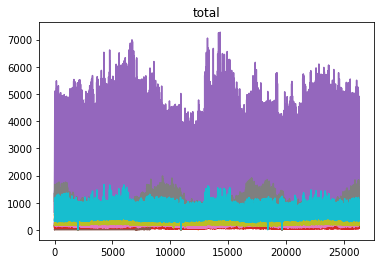

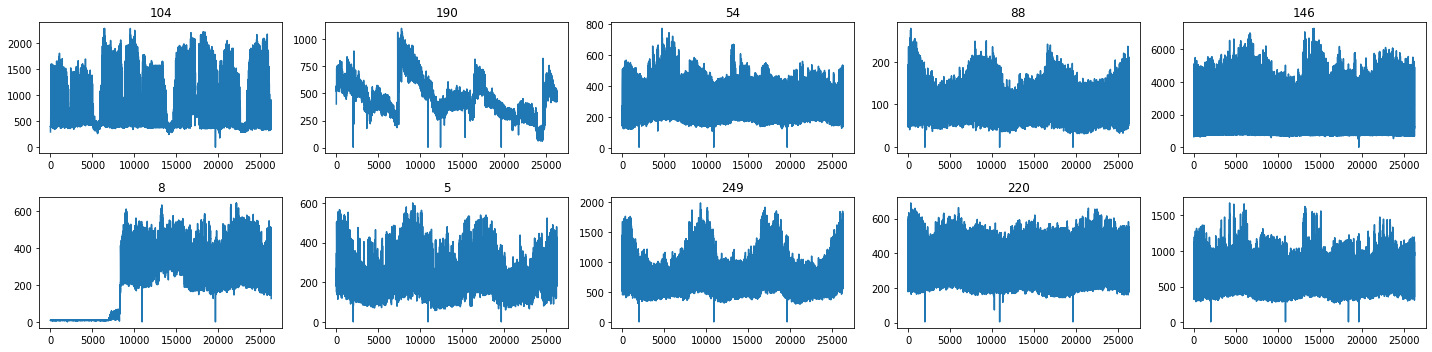

In [42]:
plot_timeseries(elect)

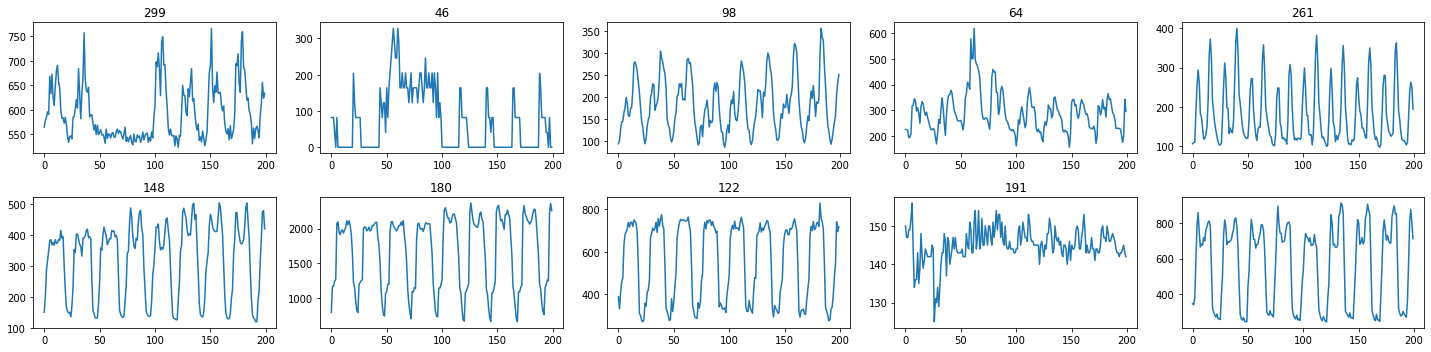

In [63]:
# 某个时间段内的数据
period = [100, 300]
plot_period_timeseries(elect, period)

- 数据规模
   
   (26304, 321), 321个序列，每个序列长度在26304，即3年每小时的用电量，
   
   
- 数据大小
    
    不同序列没有进行归一化，不同序列之间有明显的大小差别  (total图像）
    
    序列数据有明显周期性的，也有明显没有周期的, 大部分周期性挺明显 

# Traffic

In [3]:
traffic = pd.read_csv('../benchmarks/traffic.txt', header=None)
traffic.head()

,0,1,2,3,4,5,6,7,8,9,...,852,853,854,855,856,857,858,859,860,861
0,0.0048,0.0146,0.0289,0.0142,0.0064,0.0232,0.0162,0.0242,0.0341,0.0375,...,0.0051,0.0051,0.0074,0.0079,0.0051,0.0051,0.0339,0.0051,0.0100,0.0121
1,0.0072,0.0148,0.0350,0.0174,0.0084,0.0240,0.0201,0.0338,0.0434,0.0381,...,0.0036,0.0036,0.0107,0.0058,0.0036,0.0036,0.0348,0.0036,0.0087,0.0136
2,0.0040,0.0101,0.0267,0.0124,0.0049,0.0170,0.0127,0.0255,0.0332,0.0309,...,0.0030,0.0030,0.0043,0.0050,0.0030,0.0030,0.0327,0.0030,0.0061,0.0107
3,0.0039,0.0060,0.0218,0.0090,0.0029,0.0118,0.0088,0.0163,0.0211,0.0199,...,0.0033,0.0033,0.0019,0.0052,0.0033,0.0033,0.0292,0.0033,0.0040,0.0071
4,0.0042,0.0055,0.0191,0.0082,0.0024,0.0095,0.0064,0.0087,0.0144,0.0226,...,0.0049,0.0049,0.0011,0.0071,0.0049,0.0049,0.0264,0.0049,0.0040,0.0039


In [4]:
traffic.shape

(17544, 862)

In [5]:
# 数据时间戳信息
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2017-01-01')
ts = pd.date_range(start_date, end_date, freq='H', closed='left')
ts.shape

17544

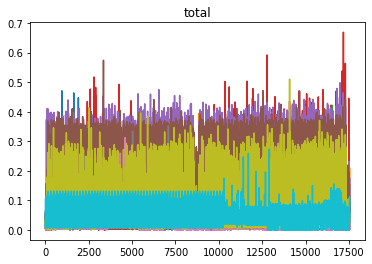

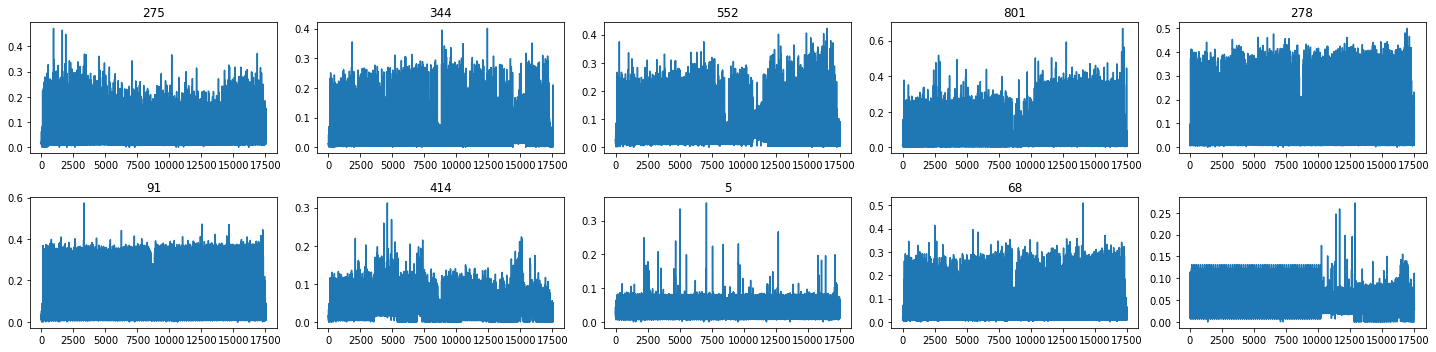

In [43]:
plot_timeseries(traffic)

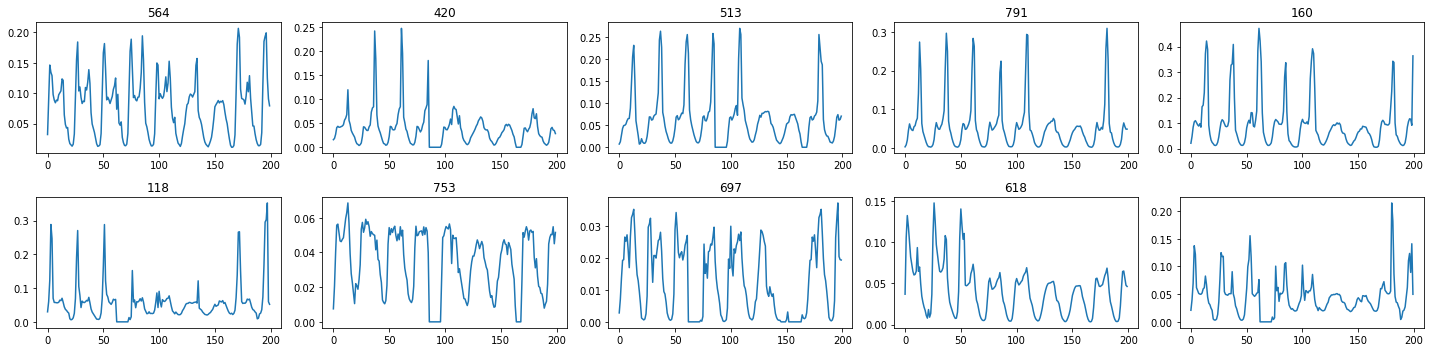

In [61]:
# 某个时间段内的数据
period = [100, 300]
plot_period_timeseries(traffic, period)

- 数据规模
   
   (17544, 862), 862个序列，每个序列长度17544，即2年每小时交通数据
   
   
- 数据大小
    
    各个序列值进行了归一化，差别不大，且数据图像也差不多

# Solar

In [36]:
solar = pd.read_csv('../benchmarks/solar_AL.txt', header=None)
solar.head()

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


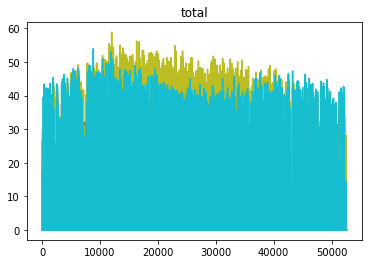

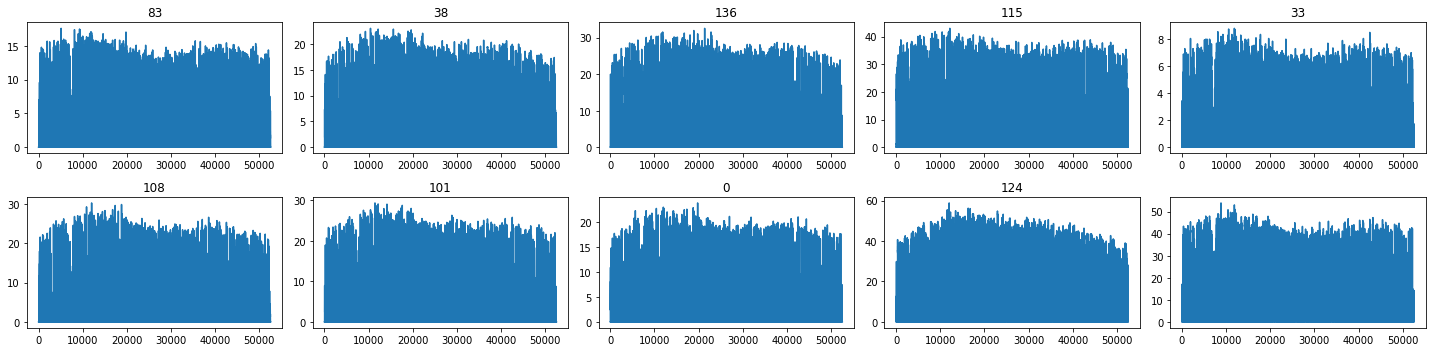

In [44]:
plot_timeseries(solar)

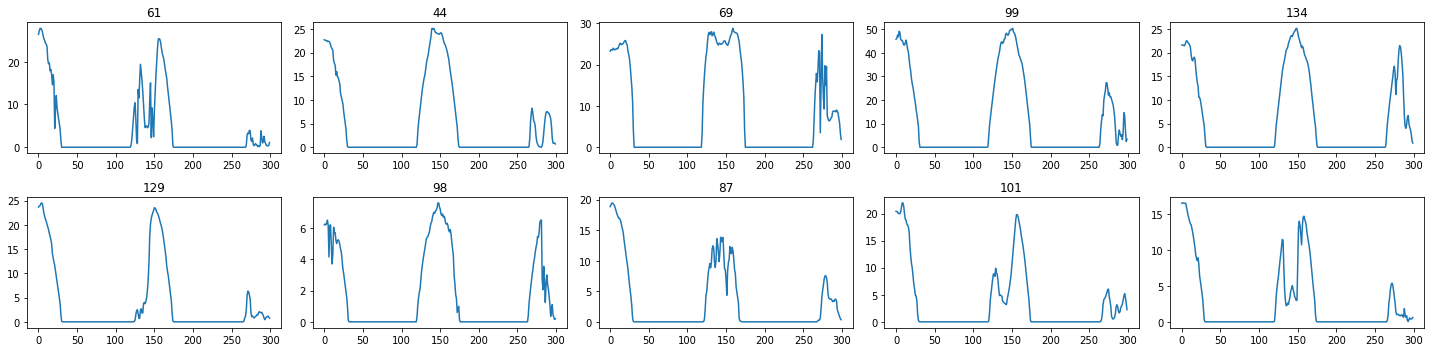

In [65]:
# 某个时间段内的数据
period = [500, 800]
plot_period_timeseries(solar, period)

In [45]:
solar.shape

(52560, 137)

- 数据规模
   
   (52560, 137), 137个序列，每个序列长度52560，即1年每10分钟交通数据
   
   
- 数据大小
    
    各个序列值进行了归一化，差别不大
    
    有较多为0的值, 断断续续的值

# Exchange

In [52]:
exchange = pd.read_csv('../benchmarks/exchange_rate.txt', header=None)
exchange.head()

,0,1,2,3,4,5,6,7
0,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
2,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316
3,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.5970,0.523834
4,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.5985,0.527426


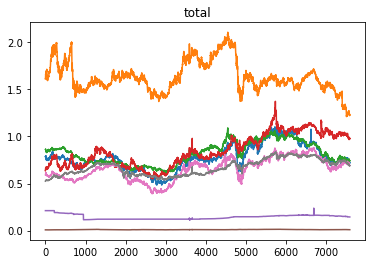

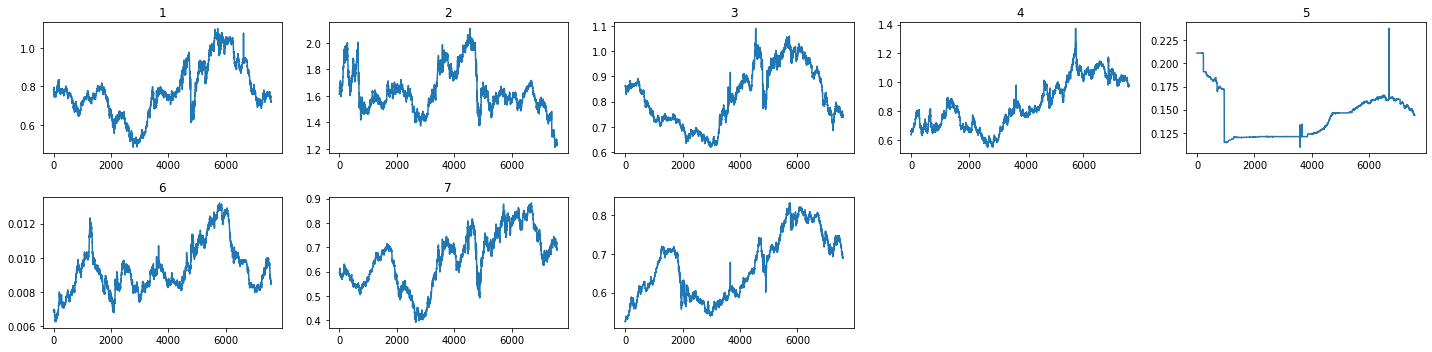

In [56]:
plot_timeseries(exchange)

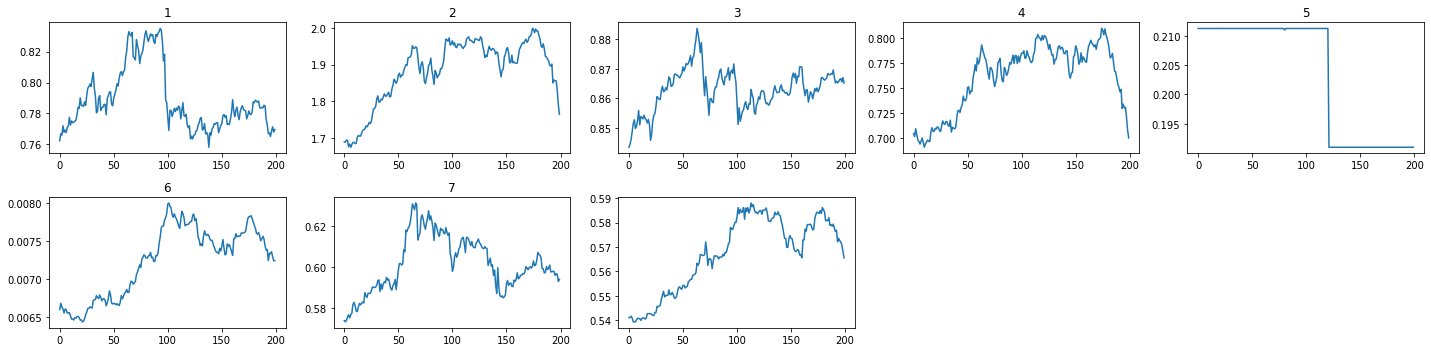

In [66]:
period = [100, 300]
plot_period_timeseries(exchange, period)

In [57]:
exchange.shape

(7588, 8)

- 数据规模
   
   (7588, 8), 8个序列，每个序列长度7588，即2016年每天的数据
   
   
- 数据大小
    
    基本都是波动上升趋势，比较类似供应链数据
    

# ETT hour

In [4]:
ett = pd.read_csv('../benchmarks/ETTh1.csv')
ett.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [5]:
ett.shape

(17420, 8)

In [50]:
ett['date'].min(), ett['date'].max()  # 2年每个小时的数据

('2016-07-01 00:00:00', '2018-06-26 19:00:00')

In [51]:
ett.columns

Index(['date', 'HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'], dtype='object')

In [ ]:
# 'HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT' 是多变量特征
# 'OT' 是ground truth

# 多变量预测就是 'HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT' 预测 'HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'
# 单变量预测是 'HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT' 预测 'OT'



In [53]:
ett.iloc[0: 100]

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
95,2016-07-04 23:00:00,12.726,6.497,9.346,3.482,3.168,1.980,25.466000
96,2016-07-05 00:00:00,11.989,5.626,8.777,2.949,3.198,1.980,25.958000
97,2016-07-05 01:00:00,12.525,6.296,8.955,3.163,3.137,2.010,25.958000
98,2016-07-05 02:00:00,12.324,6.296,8.813,3.376,2.985,1.919,26.028000
